<a href="https://colab.research.google.com/github/ftxsilva/PIE-33/blob/master/Isolation_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Détection d'anomalie non supervisée
## Isolation Forest

Le but de cette partie est d'au cours de les postes de controle identifier les mesures hors norme. 

À la fin, nous auron pour chaque poste de contrôle une précision donné pour laquel les mauvaises pièces sont identifiés




## Télécharger des libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import io
import collections
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import copy

## Télécharger le jeu des données

Dans ce contexte nous ne regardons que les variables numériques.


In [ ]:
dataframe = pd.read_csv('Data_Anomaly.csv' , sep=',',decimal=b'.')
dataframe.head()

In [ ]:
# # Si vous voulez utiliser google drive
# from google.colab import drive
# drive.mount('/content/drive')
# dataframe =  pd.read_csv('/content/drive/My Drive/PIE - 33/Détection d\'Anomalies/Data_Anomaly.csv', sep=',',decimal=b'.')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


GET FLOAT VALUES

In [ ]:
for name in dataframe.columns:
    l = np.array(dataframe[name])
    if len(collections.Counter(l)) == 1:
        dataframe.drop(name,1, inplace = True)

print('Unique types of variables: ', dataframe.dtypes.unique())
floats = dataframe.select_dtypes('float64')
categories = dataframe.select_dtypes('O')
ints = dataframe.select_dtypes('int64')

len(categories.columns) + len(floats.columns) == len(dataframe.columns)
print('# of columns: ', len(dataframe.columns))
print('# of Categorical columns: ', len(categories.columns))
print('# of Float columns: ', len(floats.columns))
print('# of Int columns: ', len(ints.columns))
floats.head()

Unique types of variables:  [dtype('float64') dtype('int64')]
# of columns:  62
# of Categorical columns:  0
# of Float columns:  39
# of Int columns:  23


,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis Max,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis Min,E24E25E37 IntercalaireFroid hauteur apres calibrage droit,E24E25E37 IntercalaireFroid hauteur apres calibrage droit Max,E24E25E37 IntercalaireFroid hauteur apres calibrage droit Min,E24E25E37 IntercalaireFroid hauteur apres calibrage gauche,E24E25E37 IntercalaireFroid hauteur apres calibrage gauche Min,E24E25E37 IntercalaireFroid hauteur apres calibrage milieu,E24E25E37 IntercalaireFroid hauteur apres calibrage milieu Max,E24E25E37 IntercalaireFroid hauteur apres calibrage milieu Min,E24E25E37 IntercalaireFroid hauteur sorti formage droit,E24E25E37 IntercalaireFroid hauteur sorti formage droit Max,E24E25E37 IntercalaireFroid hauteur sorti formage droit Min,E24E25E37 IntercalaireFroid hauteur sorti formage gauche,E24E25E37 IntercalaireFroid hauteur sorti formage gauche Max,E24E25E37 IntercalaireFroid hauteur sorti formage gauche Min,E24E25E37 IntercalaireFroid hauteur sorti formage milieu,E24E25E37 IntercalaireFroid hauteur sorti formage milieu Max,E24E25E37 IntercalaireFroid hauteur sorti formage milieu Min,E24E25E37 IntercalaireFroid largeur de bande,E24E25E37 IntercalaireFroid largeur de bande Max,E24E25E37 IntercalaireFroid largeur de bande Min,E24E25E37 IntercalaireFroid largeur de passe (longueur),E24E25E37 IntercalaireFroid largeur de passe (longueur) Min,E24E25E37 IntercalaireFroid pic et creux local dessous,E24E25E37 IntercalaireFroid pic et creux local dessous Max,E24E25E37 IntercalaireFroid pic et creux local dessous Min,E24E25E37 IntercalaireFroid pic et creux local dessus,E24E25E37 IntercalaireFroid pic et creux local dessus Max,E24E25E37 IntercalaireFroid pic et creux local dessus Min,E45E35E36 P < 6.6 10-5mbar 1,E45E35E36 P < 6.6 10-5mbar 2,E49 Hauteur maximale,E49 Hauteur minimale,E49 Masse <=15.3kg,E49 Perpendicularité passe chaude,E49 Perpendicularité passe froide,E66 valeur de fuite premier essai
0,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,10.95,11.04175,11.045,11.037,11.044,11.045,11.041,11.0055,11.009,11.001,178.752499,178.759995,178.75,281.99157,279.799988,0.032871,0.056,0.012,0.0294,0.049,0.012,0.000028,0.00004,637.510010,636.989990,14.78,1.4,2.5,0.1
1,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,10.95,11.04175,11.045,11.037,11.044,11.045,11.041,11.0055,11.009,11.001,178.752499,178.759995,178.75,281.99157,279.799988,0.032871,0.056,0.012,0.0294,0.049,0.012,0.000028,0.00004,637.659973,637.309998,14.80,1.1,1.1,0.1
2,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,10.95,11.04175,11.045,11.037,11.044,11.045,11.041,11.0055,11.009,11.001,178.752499,178.759995,178.75,281.99157,279.799988,0.032871,0.056,0.012,0.0294,0.049,0.012,0.000028,0.00004,637.400024,637.080017,14.78,2.0,2.5,1.3
3,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,10.95,11.04175,11.045,11.037,11.044,11.045,11.041,11.0055,11.009,11.001,178.752499,178.759995,178.75,281.99157,279.799988,0.032871,0.056,0.012,0.0294,0.049,0.012,0.000028,0.00004,637.090027,636.719971,14.79,1.0,1.4,0.1
4,257.957143,259.0,255.0,10.969843,10.98,10.95,10.964994,10.95,10.968014,10.98,10.95,11.04175,11.045,11.037,11.044,11.045,11.041,11.0055,11.009,11.001,178.752499,178.759995,178.75,281.99157,279.799988,0.032871,0.056,0.012,0.0294,0.049,0.012,0.000028,0.00004,637.309998,637.289978,14.79,1.1,1.3,1.7


Nous allons considérer comme pièces bonnes celles qui ont une valeur de fuíte infériure à 20.

In [ ]:
'''
    Training data
'''
# Selecting float dataset
df = floats.iloc[:,:-1]
vec = floats.iloc[:,-1].values
#Les pièces bonnes reçoivent 1
#Les pièces mauvaises reçoivent 0
defect = vec > 20 #changer de critére ici
df_defect = pd.DataFrame(defect, columns=['Classification']).astype('uint8')

# Normalizing
x = df
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

X = pd.DataFrame(x_scaled, columns=x.columns)
y = df_defect.to_numpy()
X.head()

,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis Max,E24E25E37 IntercalaireFroid Longueur Mesuree LM/100plis Min,E24E25E37 IntercalaireFroid hauteur apres calibrage droit,E24E25E37 IntercalaireFroid hauteur apres calibrage droit Max,E24E25E37 IntercalaireFroid hauteur apres calibrage droit Min,E24E25E37 IntercalaireFroid hauteur apres calibrage gauche,E24E25E37 IntercalaireFroid hauteur apres calibrage gauche Min,E24E25E37 IntercalaireFroid hauteur apres calibrage milieu,E24E25E37 IntercalaireFroid hauteur apres calibrage milieu Max,E24E25E37 IntercalaireFroid hauteur apres calibrage milieu Min,E24E25E37 IntercalaireFroid hauteur sorti formage droit,E24E25E37 IntercalaireFroid hauteur sorti formage droit Max,E24E25E37 IntercalaireFroid hauteur sorti formage droit Min,E24E25E37 IntercalaireFroid hauteur sorti formage gauche,E24E25E37 IntercalaireFroid hauteur sorti formage gauche Max,E24E25E37 IntercalaireFroid hauteur sorti formage gauche Min,E24E25E37 IntercalaireFroid hauteur sorti formage milieu,E24E25E37 IntercalaireFroid hauteur sorti formage milieu Max,E24E25E37 IntercalaireFroid hauteur sorti formage milieu Min,E24E25E37 IntercalaireFroid largeur de bande,E24E25E37 IntercalaireFroid largeur de bande Max,E24E25E37 IntercalaireFroid largeur de bande Min,E24E25E37 IntercalaireFroid largeur de passe (longueur),E24E25E37 IntercalaireFroid largeur de passe (longueur) Min,E24E25E37 IntercalaireFroid pic et creux local dessous,E24E25E37 IntercalaireFroid pic et creux local dessous Max,E24E25E37 IntercalaireFroid pic et creux local dessous Min,E24E25E37 IntercalaireFroid pic et creux local dessus,E24E25E37 IntercalaireFroid pic et creux local dessus Max,E24E25E37 IntercalaireFroid pic et creux local dessus Min,E45E35E36 P < 6.6 10-5mbar 1,E45E35E36 P < 6.6 10-5mbar 2,E49 Hauteur maximale,E49 Hauteur minimale,E49 Masse <=15.3kg,E49 Perpendicularité passe chaude,E49 Perpendicularité passe froide
0,0.841316,0.75,1.0,0.680382,1.0,0.526326,0.407519,0.624985,0.644343,1.0,0.55555,0.808333,0.613207,0.969998,0.783506,0.513271,1.0,0.636363,0.513888,0.728573,0.396468,0.199991,0.721159,0.367717,0.871787,0.508005,0.4375,0.466667,0.446054,0.475,0.411765,0.216867,0.177215,0.411514,0.465033,0.78,0.350,0.625
1,0.841316,0.75,1.0,0.680382,1.0,0.526326,0.407519,0.624985,0.644343,1.0,0.55555,0.808333,0.613207,0.969998,0.783506,0.513271,1.0,0.636363,0.513888,0.728573,0.396468,0.199991,0.721159,0.367717,0.871787,0.508005,0.4375,0.466667,0.446054,0.475,0.411765,0.216867,0.177215,0.466126,0.576922,0.80,0.275,0.275
2,0.841316,0.75,1.0,0.680382,1.0,0.526326,0.407519,0.624985,0.644343,1.0,0.55555,0.808333,0.613207,0.969998,0.783506,0.513271,1.0,0.636363,0.513888,0.728573,0.396468,0.199991,0.721159,0.367717,0.871787,0.508005,0.4375,0.466667,0.446054,0.475,0.411765,0.216867,0.177215,0.371460,0.496511,0.78,0.500,0.625
3,0.841316,0.75,1.0,0.680382,1.0,0.526326,0.407519,0.624985,0.644343,1.0,0.55555,0.808333,0.613207,0.969998,0.783506,0.513271,1.0,0.636363,0.513888,0.728573,0.396468,0.199991,0.721159,0.367717,0.871787,0.508005,0.4375,0.466667,0.446054,0.475,0.411765,0.216867,0.177215,0.258569,0.370623,0.79,0.250,0.350
4,0.841316,0.75,1.0,0.680382,1.0,0.526326,0.407519,0.624985,0.644343,1.0,0.55555,0.808333,0.613207,0.969998,0.783506,0.513271,1.0,0.636363,0.513888,0.728573,0.396468,0.199991,0.721159,0.367717,0.871787,0.508005,0.4375,0.466667,0.446054,0.475,0.411765,0.216867,0.177215,0.338675,0.569923,0.79,0.275,0.325


## TRAIN TEST SPLIT


In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=.2, random_state = 1)

## Anomaly detection for each parameter

In [ ]:
#La quantité d'anomalie dans chaqu'un des jeu des données
train_contamination = sum(train_y/len(train_y))
val_contamination = sum(val_y/len(val_y))

In [ ]:
#la méthode que nous allons utiliser
clf_name = 'Isolation Forest'
clf = IsolationForest(behaviour='new', n_estimators=100, contamination=train_contamination)

In [ ]:
#Une liste qui va sauvagarder les classificateurs au cours de la chaîne de production
classifiers = []
names = train_X.columns
#pour le premier poste de contrôle
clf.fit(np.array(train_X[names[0]]).reshape(-1,1))
classifiers.append(copy.deepcopy(clf))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:297: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.contamination == "auto":


In [ ]:
#pour les autres postes de contrôle
for index in range(1,len(names)):
  clf.fit(train_X.loc[:,names[0]:names[index]])
  classifiers.append(copy.deepcopy(clf))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:297: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.contamination == "auto":
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:297: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.contamination == "auto":
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecate

## Résultats

Nous allons comparer les résultats donnés par les classificateurs avec les critéres pré definies pour le valeur de fuíte (<20 dans ce cas) pour voir le taux de reussité de l'algorithme.

C'est important de noter ici que le isolation forest utilisé 1 pour les piéces bonnes et -1 pour les mauvaises. Donc, c'est une échelle différente de celle que nous avons définis précedemment. 

In [ ]:
taille = len(val_y)
scores = [] 
for classif, i in zip(classifiers, range(len(names))):
  #nous faisons le changement d'échelle ici
  y_pred = (classif.predict(val_X.loc[:,names[0]:names[i]])+1)/2
  scores.append(np.sum(np.abs(y_pred.reshape(-1,1) - val_y))/taille)

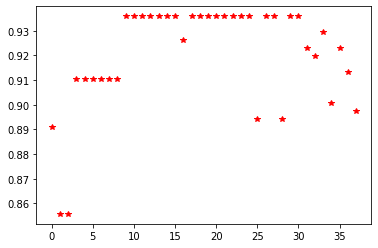

In [ ]:
#Pour regarder l'évoulution
plt.plot(scores, 'r*')

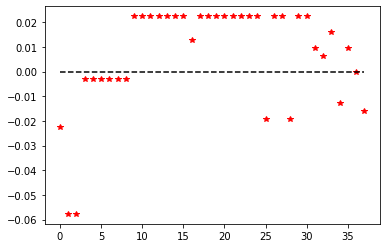

In [ ]:
#Nous pouvons aussi comparer avec le taux que nous aurions dû obtenir si la méthode retournait anomalie pour toute pièce (la droite pointillé)
#Nous pouvons noter que à partir du poste de contrôle 7, nous faisons mieux que choisir tout comme anomalie
plt.plot(scores-np.ones(len(scores))+val_contamination, 'r*')
plt.plot(np.zeros(len(scores)), 'k--')

In [ ]:
#Ainsi, à partir de tel variable nous arrivons à déterminer avec une telle précision
#quelles sont les pièces bonnes.
n = scores.index(np.max(scores))
print("Variable: {}.\nAvec une précision: {} ".format(names[n],scores[n]))

Variable: E24E25E37 IntercalaireFroid hauteur apres calibrage milieu Max.
Avec une précision: 0.9358974358974359 
